# **43177 STUTI KUMAR**

# **A2 - Feed Forward Neural Network**

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt
import numpy as np

## **MNIST**

In [ ]:
from tensorflow.keras.datasets import mnist
((X_train, Y_train), (X_test, Y_test)) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#Flatten
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 1))
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 1))

In [ ]:
#Normalize data
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [ ]:
#Label encoding
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

In [ ]:
#build sequential model
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [ ]:
#train the model
sgd = SGD(0.01)
epochs =10
model.compile(
    loss="categorical_crossentropy", 
    optimizer=sgd, 
    metrics=["accuracy"])
H = model.fit(X_train, Y_train, 
              validation_data=(X_test, Y_test),
              epochs=epochs, 
              batch_size=128)

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.9942 - accuracy: 0.7789 - val_loss: 0.9284 - val_accuracy: 0.7949
Epoch 2/10
469/469 [==============================] - 3s 5ms/step - loss: 0.9021 - accuracy: 0.7926 - val_loss: 0.8456 - val_accuracy: 0.8063
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.8285 - accuracy: 0.8041 - val_loss: 0.7798 - val_accuracy: 0.8154
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.7693 - accuracy: 0.8120 - val_loss: 0.7261 - val_accuracy: 0.8269
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.7211 - accuracy: 0.8202 - val_loss: 0.6820 - val_accuracy: 0.8327
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.6811 - accuracy: 0.8267 - val_loss: 0.6453 - val_accuracy: 0.8376
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 0.6475 - accuracy: 0.8326 - val_loss: 0.6144 - val_accuracy: 0.8425
Epoch 

In [ ]:
#make predictions
predictions = model.predict(X_test, batch_size=128)
print(classification_report(Y_test.argmax(axis=1),
                            predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

79/79 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       980
           1       0.78      0.99      0.87      1135
           2       0.85      0.76      0.80      1032
           3       0.75      0.85      0.80      1010
           4       0.70      0.75      0.73       982
           5       0.86      0.43      0.58       892
           6       0.83      0.91      0.86       958
           7       0.80      0.88      0.84      1028
           8       0.83      0.68      0.75       974
           9       0.67      0.56      0.61      1009

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.77     10000
weighted avg       0.79      0.78      0.77     10000



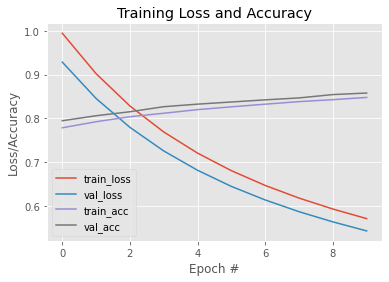

In [ ]:
#plotting the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## **CIFAR 10**

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
# load the training and testing data, scale it into the range [0, 1],
# then reshape the design matrix
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:

# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]

In [ ]:
# define the architecture using Keras
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="sigmoid"))
model.add(Dense(512, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [ ]:
# train the model using SGD
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	            metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=20, batch_size=32)

Epoch 1/20
1563/1563 [==============================] - 37s 24ms/step - loss: 2.2150 - accuracy: 0.1820 - val_loss: 2.1135 - val_accuracy: 0.2502
Epoch 2/20
1563/1563 [==============================] - 37s 24ms/step - loss: 2.0464 - accuracy: 0.2647 - val_loss: 1.9856 - val_accuracy: 0.2938
Epoch 3/20
1563/1563 [==============================] - 36s 23ms/step - loss: 1.9592 - accuracy: 0.3005 - val_loss: 1.9402 - val_accuracy: 0.2910
Epoch 4/20
1563/1563 [==============================] - 37s 23ms/step - loss: 1.9135 - accuracy: 0.3171 - val_loss: 1.8904 - val_accuracy: 0.3287
Epoch 5/20
1563/1563 [==============================] - 38s 24ms/step - loss: 1.8824 - accuracy: 0.3330 - val_loss: 1.8699 - val_accuracy: 0.3475
Epoch 6/20
1563/1563 [==============================] - 37s 24ms/step - loss: 1.8588 - accuracy: 0.3437 - val_loss: 1.8392 - val_accuracy: 0.3526
Epoch 7/20
1563/1563 [==============================] - 36s 23ms/step - loss: 1.8392 - accuracy: 0.3504 - val_loss: 1.8309 -

In [ ]:
# evaluate the network
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=labelNames))

313/313 [==============================] - 3s 9ms/step
              precision    recall  f1-score   support

    airplane       0.33      0.68      0.44      1000
  automobile       0.50      0.47      0.49      1000
        bird       0.27      0.32      0.29      1000
         cat       0.27      0.35      0.31      1000
        deer       0.37      0.28      0.32      1000
         dog       0.55      0.20      0.29      1000
        frog       0.38      0.54      0.45      1000
       horse       0.58      0.29      0.38      1000
        ship       0.53      0.33      0.41      1000
       truck       0.48      0.43      0.45      1000

    accuracy                           0.39     10000
   macro avg       0.43      0.39      0.38     10000
weighted avg       0.43      0.39      0.38     10000



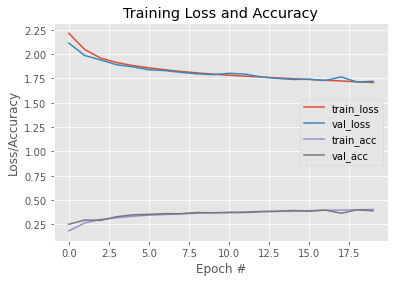

In [ ]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()